# SHAP example

Here we show how one could use the shap python library and the `TreeExplainer` object to calculate the shap values for the LGBMOrdinal model.

We note that the LGBMOrdinal model is based off the LGBMRegressor object, which is not a classifier. This allows us to calculate only one shap value per prediction, however many classes there are to predict, making it much easier to _explain_ the contribution of each feature to the prediction as well as the direction of the contribution.

In [13]:
import shap
from shap import TreeExplainer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from ordinalgbt.data import make_ordinal_classification
from ordinalgbt.lgb import LGBMOrdinal


## Training a model

In [2]:
X,y = make_ordinal_classification(n_classes=4,n_samples=1000, n_features = 100, n_informative =10,noise=2,
                                  random_state=42)
X_train,X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

In [4]:
model = LGBMOrdinal()
model.fit(X_train, y_train)

LGBMOrdinal(objective=<function LGBMOrdinal._lgb_loss_factory.<locals>.loss at 0x143ea2040>)

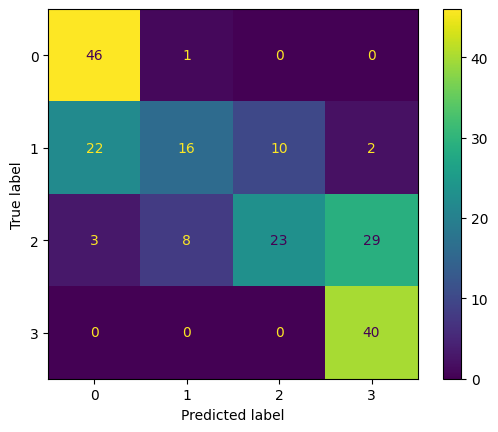

In [5]:
ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test))

## Calculating the shap values

In [7]:
explainer = TreeExplainer(model, model_output='raw')

In [14]:
shap_values = explainer.shap_values(X_test)

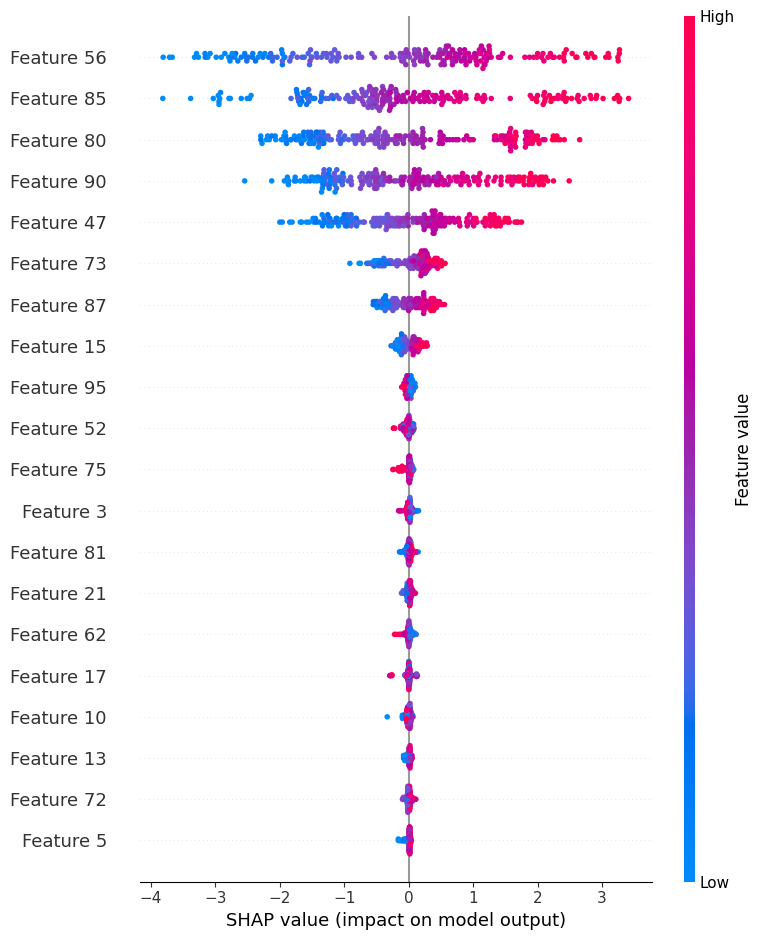

In [15]:
shap.summary_plot(shap_values,X_test)

In [26]:

shap_values = explainer(X_test)

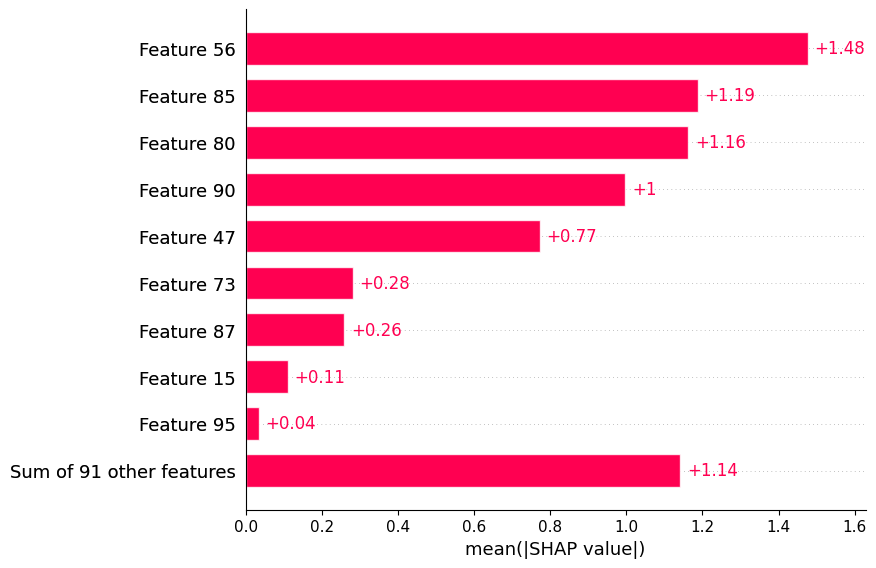

In [27]:
shap.plots.bar(shap_values)

array(0.8962205)